In [64]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("data/patient_heart_rate.csv").dropna(how="all").drop_duplicates()
df.head()

df[["First Name", "Last Name"]] = df["Name"].str.split(expand=True)
df = df.drop(labels=["Name"], axis=1)
df.head()

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [66]:
def convert_weight(x):
    if pd.isna(x):
        return x
    
    x = str(x)
    if "lbs" in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        return int(float_x / 2.2)
    elif "kgs" in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        return int(float_x)
    return x

df['Weight'] = df['Weight'].apply(convert_weight)
df

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85.0,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scööpy,Doo
10,9.0,52.0,85.0,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


In [67]:
df = df.rename(columns={"Weight": "Weight_kgs"})
df.head()

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther


In [68]:
df = df.drop_duplicates(subset=["First Name", "Last Name", "Age", "Weight_kgs"])
df.head()

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther


In [69]:
df['First Name'] = df['First Name'].replace({r'[^\x00-\x7F]+': ''}, regex=True)
df['Last Name'] = df['Last Name'].replace({r'[^\x00-\x7F]+': ''}, regex=True)
df.head()


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther


In [70]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df.head()

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther


In [71]:
df["Weight_kgs"] = df["Weight_kgs"].fillna(df["Weight_kgs"].median())
df["Weight_kgs"].astype(int)
df.head()

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther


In [72]:
df = pd.melt(df, 
             id_vars=['Id', 'Age', 'Weight_kgs', 'First Name', 'Last Name'], 
             value_name='PulseRate', 
             var_name='gender_time')

df = df.sort_values(['Id', 'Age', 'Weight_kgs', 'First Name', 'Last Name'])
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,gender_time,PulseRate
0,1.0,56.0,70.0,Micky,Mous,m0006,72
14,1.0,56.0,70.0,Micky,Mous,m0612,69
28,1.0,56.0,70.0,Micky,Mous,m1218,71
42,1.0,56.0,70.0,Micky,Mous,f0006,-
56,1.0,56.0,70.0,Micky,Mous,f0612,-


In [73]:
df_temp = df['gender_time'].str.extract(r"(\D)(\d{2})(\d{2})", expand=True)
df_temp

,0,1,2
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [74]:
df_temp.columns = ["Gender", "Lower Hour", "Upper Hour"]
df_temp.head()

,Gender,Lower Hour,Upper Hour
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12


In [75]:
df = pd.concat([df, df_temp], axis = 1).drop(["gender_time"], axis = 1)
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower Hour,Upper Hour
0,1.0,56.0,70.0,Micky,Mous,72,m,00,06
14,1.0,56.0,70.0,Micky,Mous,69,m,06,12
28,1.0,56.0,70.0,Micky,Mous,71,m,12,18
42,1.0,56.0,70.0,Micky,Mous,-,f,00,06
56,1.0,56.0,70.0,Micky,Mous,-,f,06,12


In [76]:
df = df.replace("-", np.nan).dropna(subset=["PulseRate"])
df.head(10)

,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower Hour,Upper Hour
0,1.0,56.0,70.0,Micky,Mous,72,m,00,06
14,1.0,56.0,70.0,Micky,Mous,69,m,06,12
28,1.0,56.0,70.0,Micky,Mous,71,m,12,18
43,2.0,34.0,70.0,Donald,Duck,85,f,00,06
57,2.0,34.0,70.0,Donald,Duck,84,f,06,12
71,2.0,34.0,70.0,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78.0,Scrooge,McDuck,78,m,00,06


In [77]:
firstname_null = df["First Name"].isnull().sum()
lastname_null =  df["Last Name"].isnull().sum()

print(f"Dữ liệu First Name bị thiếu: {firstname_null}\nDữ liệu Last Name bị thiếu: {lastname_null}")

Dữ liệu First Name bị thiếu: 3
Dữ liệu Last Name bị thiếu: 3


In [78]:
df = df.reset_index()
df.to_csv("patient_heart_rate.csv")

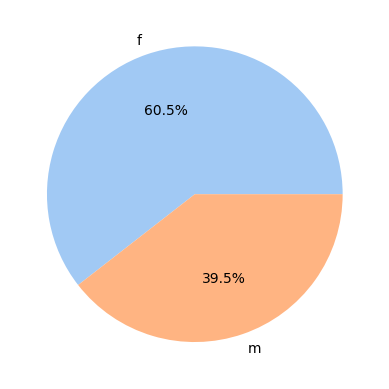

In [79]:
df_gender_count = df.groupby(["Gender"]).agg(count=("Gender", "count"))

colors = sns.color_palette('pastel')
plt.pie(x = list(df_gender_count["count"]), labels = list(df_gender_count.index), colors = colors, autopct='%1.1f%%')
plt.show()


In [80]:
df["Full Name"] = df["First Name"] + " " + df["Last Name"]
df.head()

,index,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower Hour,Upper Hour,Full Name
0,0,1.0,56.0,70.0,Micky,Mous,72,m,00,06,Micky Mous
1,14,1.0,56.0,70.0,Micky,Mous,69,m,06,12,Micky Mous
2,28,1.0,56.0,70.0,Micky,Mous,71,m,12,18,Micky Mous
3,43,2.0,34.0,70.0,Donald,Duck,85,f,00,06,Donald Duck
4,57,2.0,34.0,70.0,Donald,Duck,84,f,06,12,Donald Duck


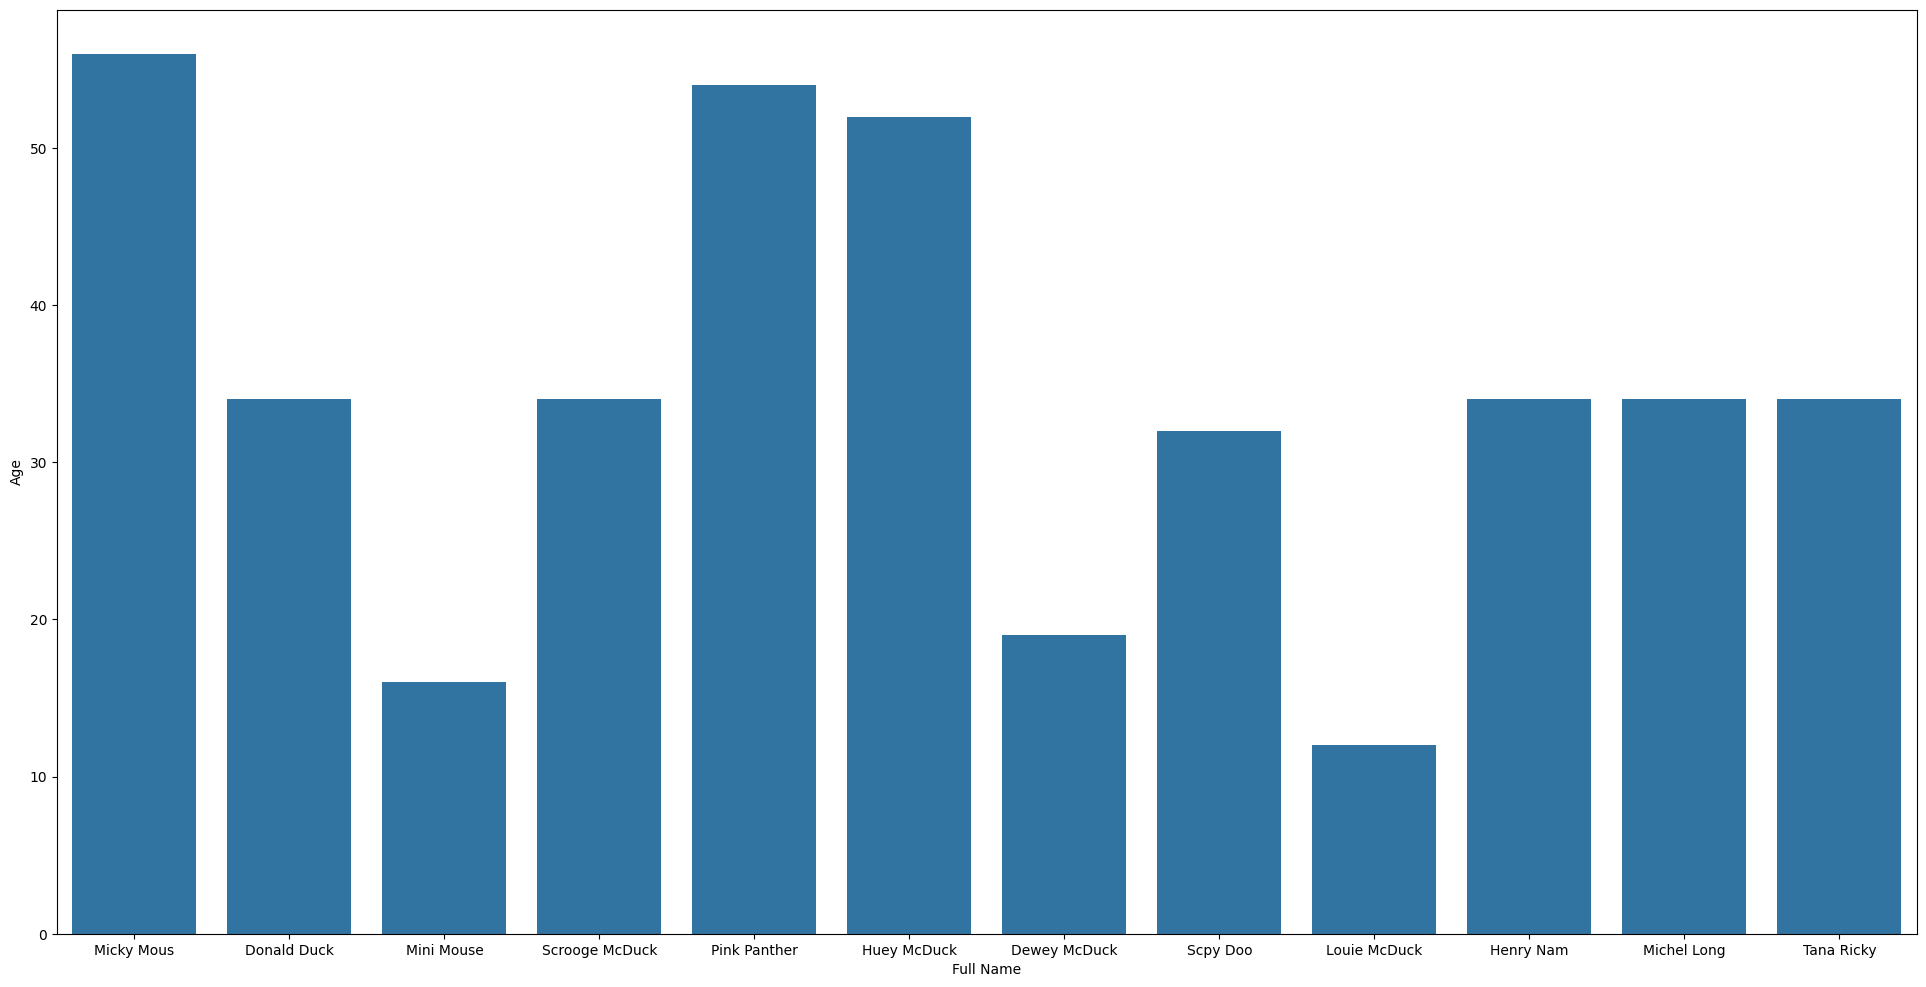

In [81]:
plt.figure(figsize=(24, 12))
sns.barplot(y="Age", x="Full Name", data=df)
plt.show()

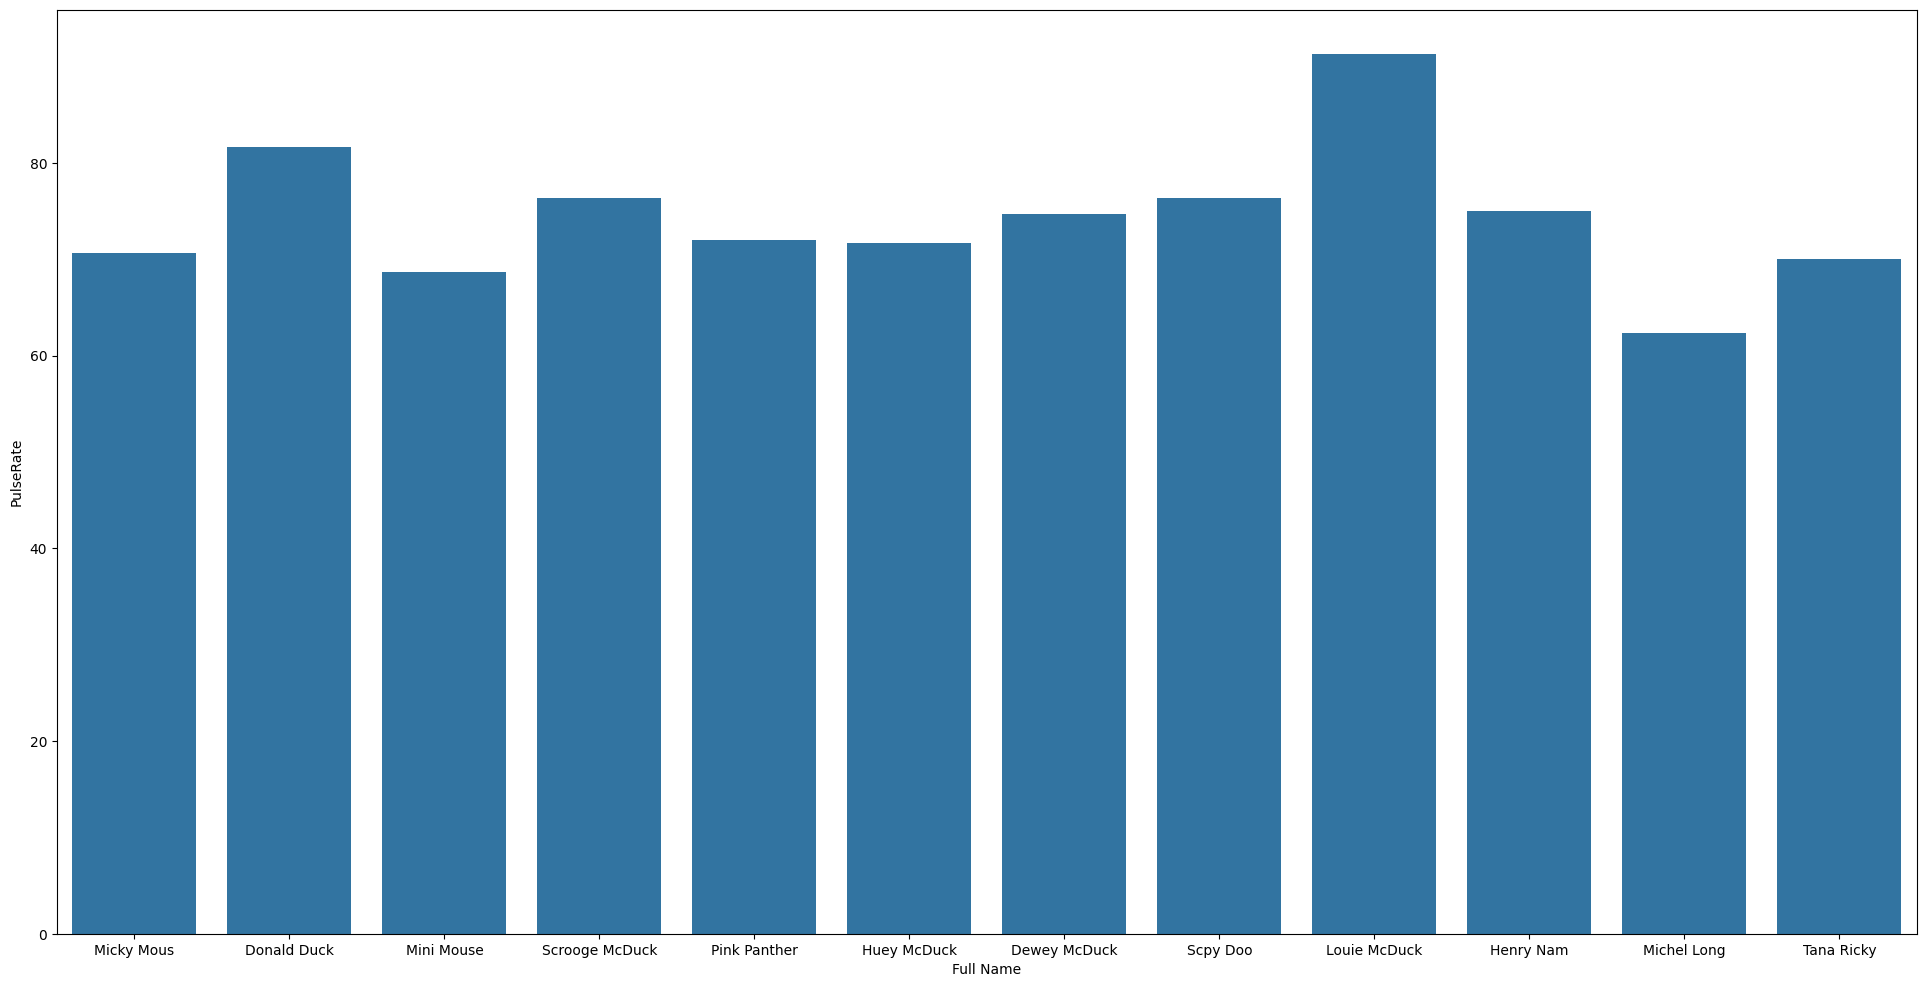

In [82]:
df["PulseRate"] = df["PulseRate"].astype(int)

plt.figure(figsize=(24, 12))
sns.barplot(x="Full Name", y="PulseRate", data=df, errorbar=None, estimator= np.mean)
plt.show()

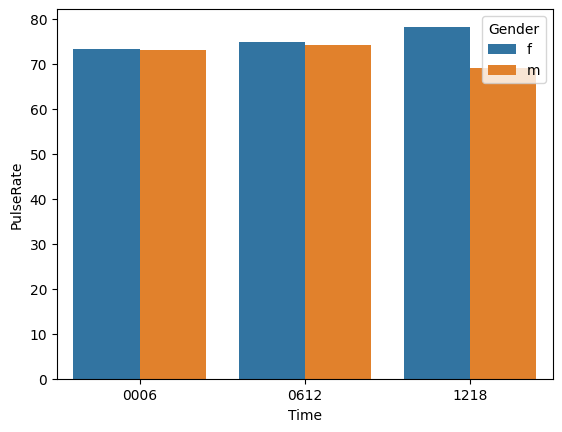

In [83]:
df_avg = df.groupby(["Lower Hour", "Upper Hour", "Gender"]).agg({"PulseRate": "mean"})
df_avg = df_avg.reset_index()
df_avg["Time"] = df["Lower Hour"] + df["Upper Hour"]

sns.barplot(y="PulseRate", x="Time", hue="Gender", data=df_avg, errorbar=None)
plt.show()

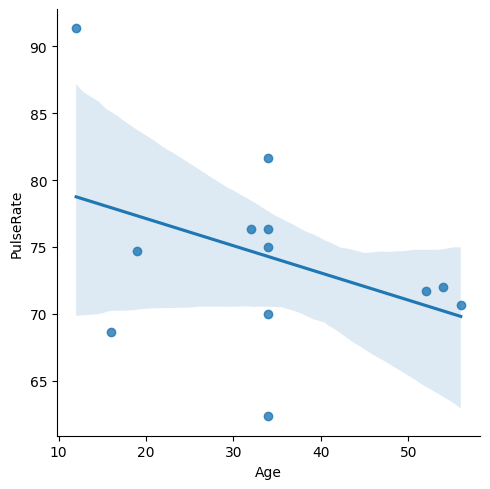

In [84]:
df_avg = df.groupby("Full Name").agg({"Age": "mean", "PulseRate": "mean"}).reset_index()
df_avg
sns.lmplot(x="Age", y="PulseRate", data=df_avg)
plt.show()

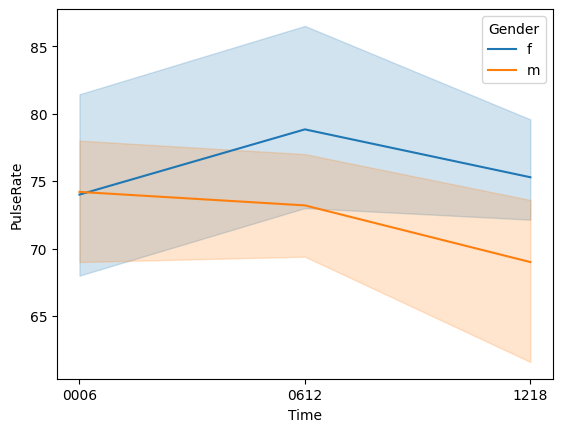

In [85]:
df["Time"] = df["Lower Hour"] + df["Upper Hour"]
df_avg = df.groupby(["Full Name", "Gender", "Time"]).agg({ "PulseRate": "mean"}).reset_index()

sns.lineplot(x="Time", y="PulseRate", hue="Gender", data=df_avg)
plt.show()